# Lead Score - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing all required packages
import numpy as np
import pandas as pd
from datetime import datetime as dt

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
pd.set_option('display.max_columns',105)

# 1 : Loading and Cleaning Data

##  1.1  Importing Data 

In [2]:
# Loading the data using Pandas
df = pd.read_csv(r"C:\Users\Sandesh\Desktop\Leads.csv", sep = ',' ,encoding = "ISO-8859-1")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 1.2 Inspecting the dataframe
To avail a generic idea of the dataframes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [4]:
# To avail the number of rows and columns
df.shape

(9240, 37)

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 1.3 Classifying dataframe in Continous and Categorical Columns

In [6]:
continous_data = df.select_dtypes(include=[np.number])
continous_data

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,660737,0,0.0,0,0.00,15.0,15.0
1,660728,0,5.0,674,2.50,15.0,15.0
2,660727,1,2.0,1532,2.00,14.0,20.0
3,660719,0,1.0,305,1.00,13.0,17.0
4,660681,1,2.0,1428,1.00,15.0,18.0
...,...,...,...,...,...,...,...
9235,579564,1,8.0,1845,2.67,15.0,17.0
9236,579546,0,2.0,238,2.00,14.0,19.0
9237,579545,0,2.0,199,2.00,13.0,20.0
9238,579538,1,3.0,499,3.00,15.0,16.0


In [7]:
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_data

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,Landing Page Submission,Direct Traffic,Yes,No,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,Landing Page Submission,Direct Traffic,No,No,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,Landing Page Submission,Direct Traffic,Yes,No,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,Landing Page Submission,Google,No,No,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,No,No,SMS Sent


## Inference
We have been able to identify that there are 7 numeric variables namely (Lead Number Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Asymmetrique Activity Score, Asymmetrique Profile Score) and 30 are Categorical variables.

Also, we have been able to observe that there are values called "SELECT" in multiple variables which are not entered by the user. As these are not useful for analysis, we have to convert them to Null values.

## 1.4 Cleaning the dataframe

In [8]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace('Select',np.nan)
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [9]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# Dropping columns with null values more than 40%
df = df.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],axis=1)

In [11]:
df.shape

(9240, 30)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 

In [13]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [14]:
# Dropping unique valued columns as these wont have a great impact in the analysis
df= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [15]:
df.shape

(9240, 25)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 

In [17]:
# Removing all the score variables that were entered by the sales team.
df = df.drop(['Tags','Lead Number'],axis=1)
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,NaN,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified


In [18]:
# Rechecking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [19]:
# Converting all the values to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [20]:
# Identifying the NaN values within each column
for col in ['TotalVisits','Lead Source','Page Views Per Visit','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','City']:
    print('\n############################################')
    print('Unique value distribution of ' + str(col))
    print('############################################')
    print(((round(df[col].value_counts(dropna=False).sort_values(ascending = False))/len(df))*100),2)


############################################
Unique value distribution of TotalVisits
############################################
0.0      23.690476
2.0      18.181818
3.0      14.134199
4.0      12.121212
5.0       8.474026
6.0       5.043290
1.0       4.274892
7.0       3.344156
8.0       2.424242
9.0       1.774892
NaN       1.482684
10.0      1.233766
11.0      0.930736
13.0      0.519481
12.0      0.487013
14.0      0.389610
16.0      0.227273
15.0      0.194805
17.0      0.173160
18.0      0.162338
20.0      0.129870
19.0      0.097403
21.0      0.064935
23.0      0.064935
27.0      0.054113
25.0      0.054113
24.0      0.054113
22.0      0.032468
28.0      0.021645
26.0      0.021645
29.0      0.021645
32.0      0.010823
141.0     0.010823
41.0      0.010823
251.0     0.010823
74.0      0.010823
42.0      0.010823
30.0      0.010823
43.0      0.010823
54.0      0.010823
115.0     0.010823
55.0      0.010823
Name: TotalVisits, dtype: float64 2

#################################

In [21]:
df['TotalVisits'] = df['TotalVisits'].fillna(0.0) 
df['Lead Source'] = df['Lead Source'].fillna('google')
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(0.00)
df['Last Activity'] = df['Last Activity'].fillna('email opened')
df['Country'] = df['Country'].fillna('india')
df['Specialization'] = df['Specialization'].fillna('finance management')
df['What is your current occupation'] = df['What is your current occupation'].fillna('unemployed')
df['City'] = df['City'].fillna('mumbai')
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('better career prospects')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
Prospect ID                                      9240 non-null object
Lead Origin                                      9240 non-null object
Lead Source                                      9240 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9240 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9240 non-null float64
Last Activity                                    9240 non-null object
Country                                          9240 non-null object
Specialization                                   9240 non-null object
What is your current occupation                  9240

In [22]:
# Rechecking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [23]:
# Identifying the imbalance within the columns
for col in ['Lead Origin','Lead Source','Do Not Email','Do Not Call','Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit','Last Activity','Country','Specialization','What matters most to you in choosing a course','Search','Newspaper Article','Digital Advertisement','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','City','A free copy of Mastering The Interview','Last Notable Activity']:
    print('\n############################################')
    print('Unique value distribution of ' + str(col))
    print('############################################')
    print(((round(df[col].value_counts(dropna=False).sort_values(ascending = False))/len(df))*100),2)


############################################
Unique value distribution of Lead Origin
############################################
landing page submission    52.878788
api                        38.744589
lead add form               7.770563
lead import                 0.595238
quick add form              0.010823
Name: Lead Origin, dtype: float64 2

############################################
Unique value distribution of Lead Source
############################################
google               31.482684
direct traffic       27.521645
olark chat           18.993506
organic search       12.489177
reference             5.779221
welingak website      1.536797
referral sites        1.352814
facebook              0.595238
bing                  0.064935
click2call            0.043290
press_release         0.021645
social media          0.021645
live chat             0.021645
testone               0.010823
youtubechannel        0.010823
nc_edm                0.010823
welearn            

## Inference

We infer from the above that the columns mentioned  ('Do Not Email', 'Do Not Call', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations') are highly skewed and can be dropped these will not be apt for modeling.

In [24]:
# Removing all the score variables that are highly skewed.
df = df.drop(['Do Not Email', 'Do Not Call', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations','Country'],axis=1)

In [25]:
df.shape

(9240, 13)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
Prospect ID                               9240 non-null object
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Last Activity                             9240 non-null object
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
City                                      9240 non-null object
A free copy of Mastering The Interview    9240 non-null object
Last Notable Activity                     9240 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 938.6+ KB


In [27]:
# There are so many columns with high number of variables with very low %. These are being merged together and grouped under the variale "Others".
# Converting Lead Origin with lower contribution to 'others_leadorigin'

df['Lead Origin'].replace('lead import','others_leadorigin',inplace=True)
df['Lead Origin'].replace('quick add form','others_leadorigin',inplace=True)

In [28]:
(df['Lead Origin'].value_counts(normalize=True))*100

landing page submission    52.878788
api                        38.744589
lead add form               7.770563
others_leadorigin           0.606061
Name: Lead Origin, dtype: float64

In [29]:
# Converting Lead Source with lower contribution to 'others_leadsource'

df['Lead Source'].replace('welingak website','others_leadsource',inplace=True)
df['Lead Source'].replace('referral sites','others_leadsource',inplace=True)
df['Lead Source'].replace('facebook','others_leadsource',inplace=True)
df['Lead Source'].replace('bing','others_leadsource',inplace=True)
df['Lead Source'].replace('click2call','others_leadsource',inplace=True)
df['Lead Source'].replace('live chat','others_leadsource',inplace=True)
df['Lead Source'].replace('press_release','others_leadsource',inplace=True)
df['Lead Source'].replace('social media','others_leadsource',inplace=True)
df['Lead Source'].replace('pay per click ads','others_leadsource',inplace=True)
df['Lead Source'].replace('blog','others_leadsource',inplace=True)
df['Lead Source'].replace('youtubechannel','others_leadsource',inplace=True)
df['Lead Source'].replace('nc_edm','others_leadsource',inplace=True)
df['Lead Source'].replace('testone','others_leadsource',inplace=True)
df['Lead Source'].replace('welearnblog_home','others_leadsource',inplace=True)
df['Lead Source'].replace('welearn','others_leadsource',inplace=True)

In [30]:
(df['Lead Source'].value_counts(normalize=True))*100

google               31.482684
direct traffic       27.521645
olark chat           18.993506
organic search       12.489177
reference             5.779221
others_leadsource     3.733766
Name: Lead Source, dtype: float64

In [31]:
# Converting Last Activity with lower contribution to 'others_lastactivity'
df['Last Activity'].replace('unsubscribed','others_lastactivity',inplace=True)
df['Last Activity'].replace('had a phone conversation','others_lastactivity',inplace=True)
df['Last Activity'].replace('approached upfront','others_lastactivity',inplace=True)
df['Last Activity'].replace('view in browser link clicked','others_lastactivity',inplace=True)
df['Last Activity'].replace('email marked spam','others_lastactivity',inplace=True)
df['Last Activity'].replace('email received','others_lastactivity',inplace=True)
df['Last Activity'].replace('visited booth in tradeshow','others_lastactivity',inplace=True)
df['Last Activity'].replace('resubscribed to emails','others_lastactivity',inplace=True)

In [32]:
(df['Last Activity'].value_counts(normalize=True))*100

email opened                 38.311688
sms sent                     29.707792
olark chat conversation      10.530303
page visited on website       6.926407
converted to lead             4.632035
email bounced                 3.528139
email link clicked            2.889610
form submitted on website     1.255411
others_lastactivity           1.212121
unreachable                   1.006494
Name: Last Activity, dtype: float64

In [33]:
# Converting Specialization with lower contribution to 'others_specialization'
df['Specialization'].replace('international business','others_specialization',inplace=True)
df['Specialization'].replace('healthcare management','others_specialization',inplace=True)
df['Specialization'].replace('hospitality management','others_specialization',inplace=True)
df['Specialization'].replace('e-commerce','others_specialization',inplace=True)
df['Specialization'].replace('retail management','others_specialization',inplace=True)
df['Specialization'].replace('rural and agribusiness','others_specialization',inplace=True)
df['Specialization'].replace('e-business','others_specialization',inplace=True)
df['Specialization'].replace('services excellence','others_specialization',inplace=True)

In [34]:
(df['Specialization'].value_counts(normalize=True))*100

finance management                   47.142857
human resource management             9.177489
marketing management                  9.069264
others_specialization                 9.015152
operations management                 5.443723
business administration               4.361472
it projects management                3.961039
supply chain management               3.777056
banking, investment and insurance     3.658009
media and advertising                 2.196970
travel and tourism                    2.196970
Name: Specialization, dtype: float64

In [35]:
# Converting Specialization with lower contribution to 'others_specialization'
df['Last Notable Activity'].replace('olark chat conversation','others_lastnotableactivity',inplace=True)
df['Last Notable Activity'].replace('email link clicked','others_lastnotableactivity',inplace=True)
df['Last Notable Activity'].replace('email bounced','others_lastnotableactivity',inplace=True)
df['Last Notable Activity'].replace('unsubscribed','others_lastnotableactivity',inplace=True)
df['Last Notable Activity'].replace('unreachable','others_lastnotableactivity',inplace=True)
df['Last Notable Activity'].replace('had a phone conversation','others_lastnotableactivity',inplace=True)
df['Last Notable Activity'].replace('email marked spam','others_lastnotableactivity',inplace=True)
df['Last Notable Activity'].replace('approached upfront','others_lastnotableactivity',inplace=True)
df['Last Notable Activity'].replace('view in browser link clicked','others_lastnotableactivity',inplace=True)
df['Last Notable Activity'].replace('form submitted on website','others_lastnotableactivity',inplace=True)
df['Last Notable Activity'].replace('email received','others_lastnotableactivity',inplace=True)
df['Last Notable Activity'].replace('resubscribed to emails','others_lastnotableactivity',inplace=True)

In [36]:
(df['Last Notable Activity'].value_counts(normalize=True))*100

modified                      36.872294
email opened                  30.595238
sms sent                      23.506494
others_lastnotableactivity     5.584416
page visited on website        3.441558
Name: Last Notable Activity, dtype: float64

In [37]:
# Checking the various columns
df.loc[:, df.dtypes == 'object'].columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [38]:
# Code for checking number of rows retained in percentage
round(100*(df.shape[0])/(df.shape[0]),2)

100.0

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
Prospect ID                               9240 non-null object
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Last Activity                             9240 non-null object
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
City                                      9240 non-null object
A free copy of Mastering The Interview    9240 non-null object
Last Notable Activity                     9240 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 938.6+ KB


In [40]:
# Removing Id values since they are unique for everyone
df2 = df.drop('Prospect ID',1)
df2.shape

(9240, 12)

# 2. EDA
## 2.1. Univariate Analysis

In [41]:
# Considering Categorical Variables
categorical_data = df2.select_dtypes(exclude=[np.number])
categorical_data

,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,page visited on website,finance management,unemployed,mumbai,no,modified
1,api,organic search,email opened,finance management,unemployed,mumbai,no,email opened
2,landing page submission,direct traffic,email opened,business administration,student,mumbai,yes,email opened
3,landing page submission,direct traffic,unreachable,media and advertising,unemployed,mumbai,no,modified
4,landing page submission,google,converted to lead,finance management,unemployed,mumbai,no,modified
...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,others_lastactivity,it projects management,unemployed,mumbai,no,others_lastnotableactivity
9236,landing page submission,direct traffic,sms sent,media and advertising,unemployed,mumbai,yes,sms sent
9237,landing page submission,direct traffic,sms sent,business administration,unemployed,mumbai,yes,sms sent
9238,landing page submission,google,sms sent,human resource management,unemployed,other metro cities,no,sms sent


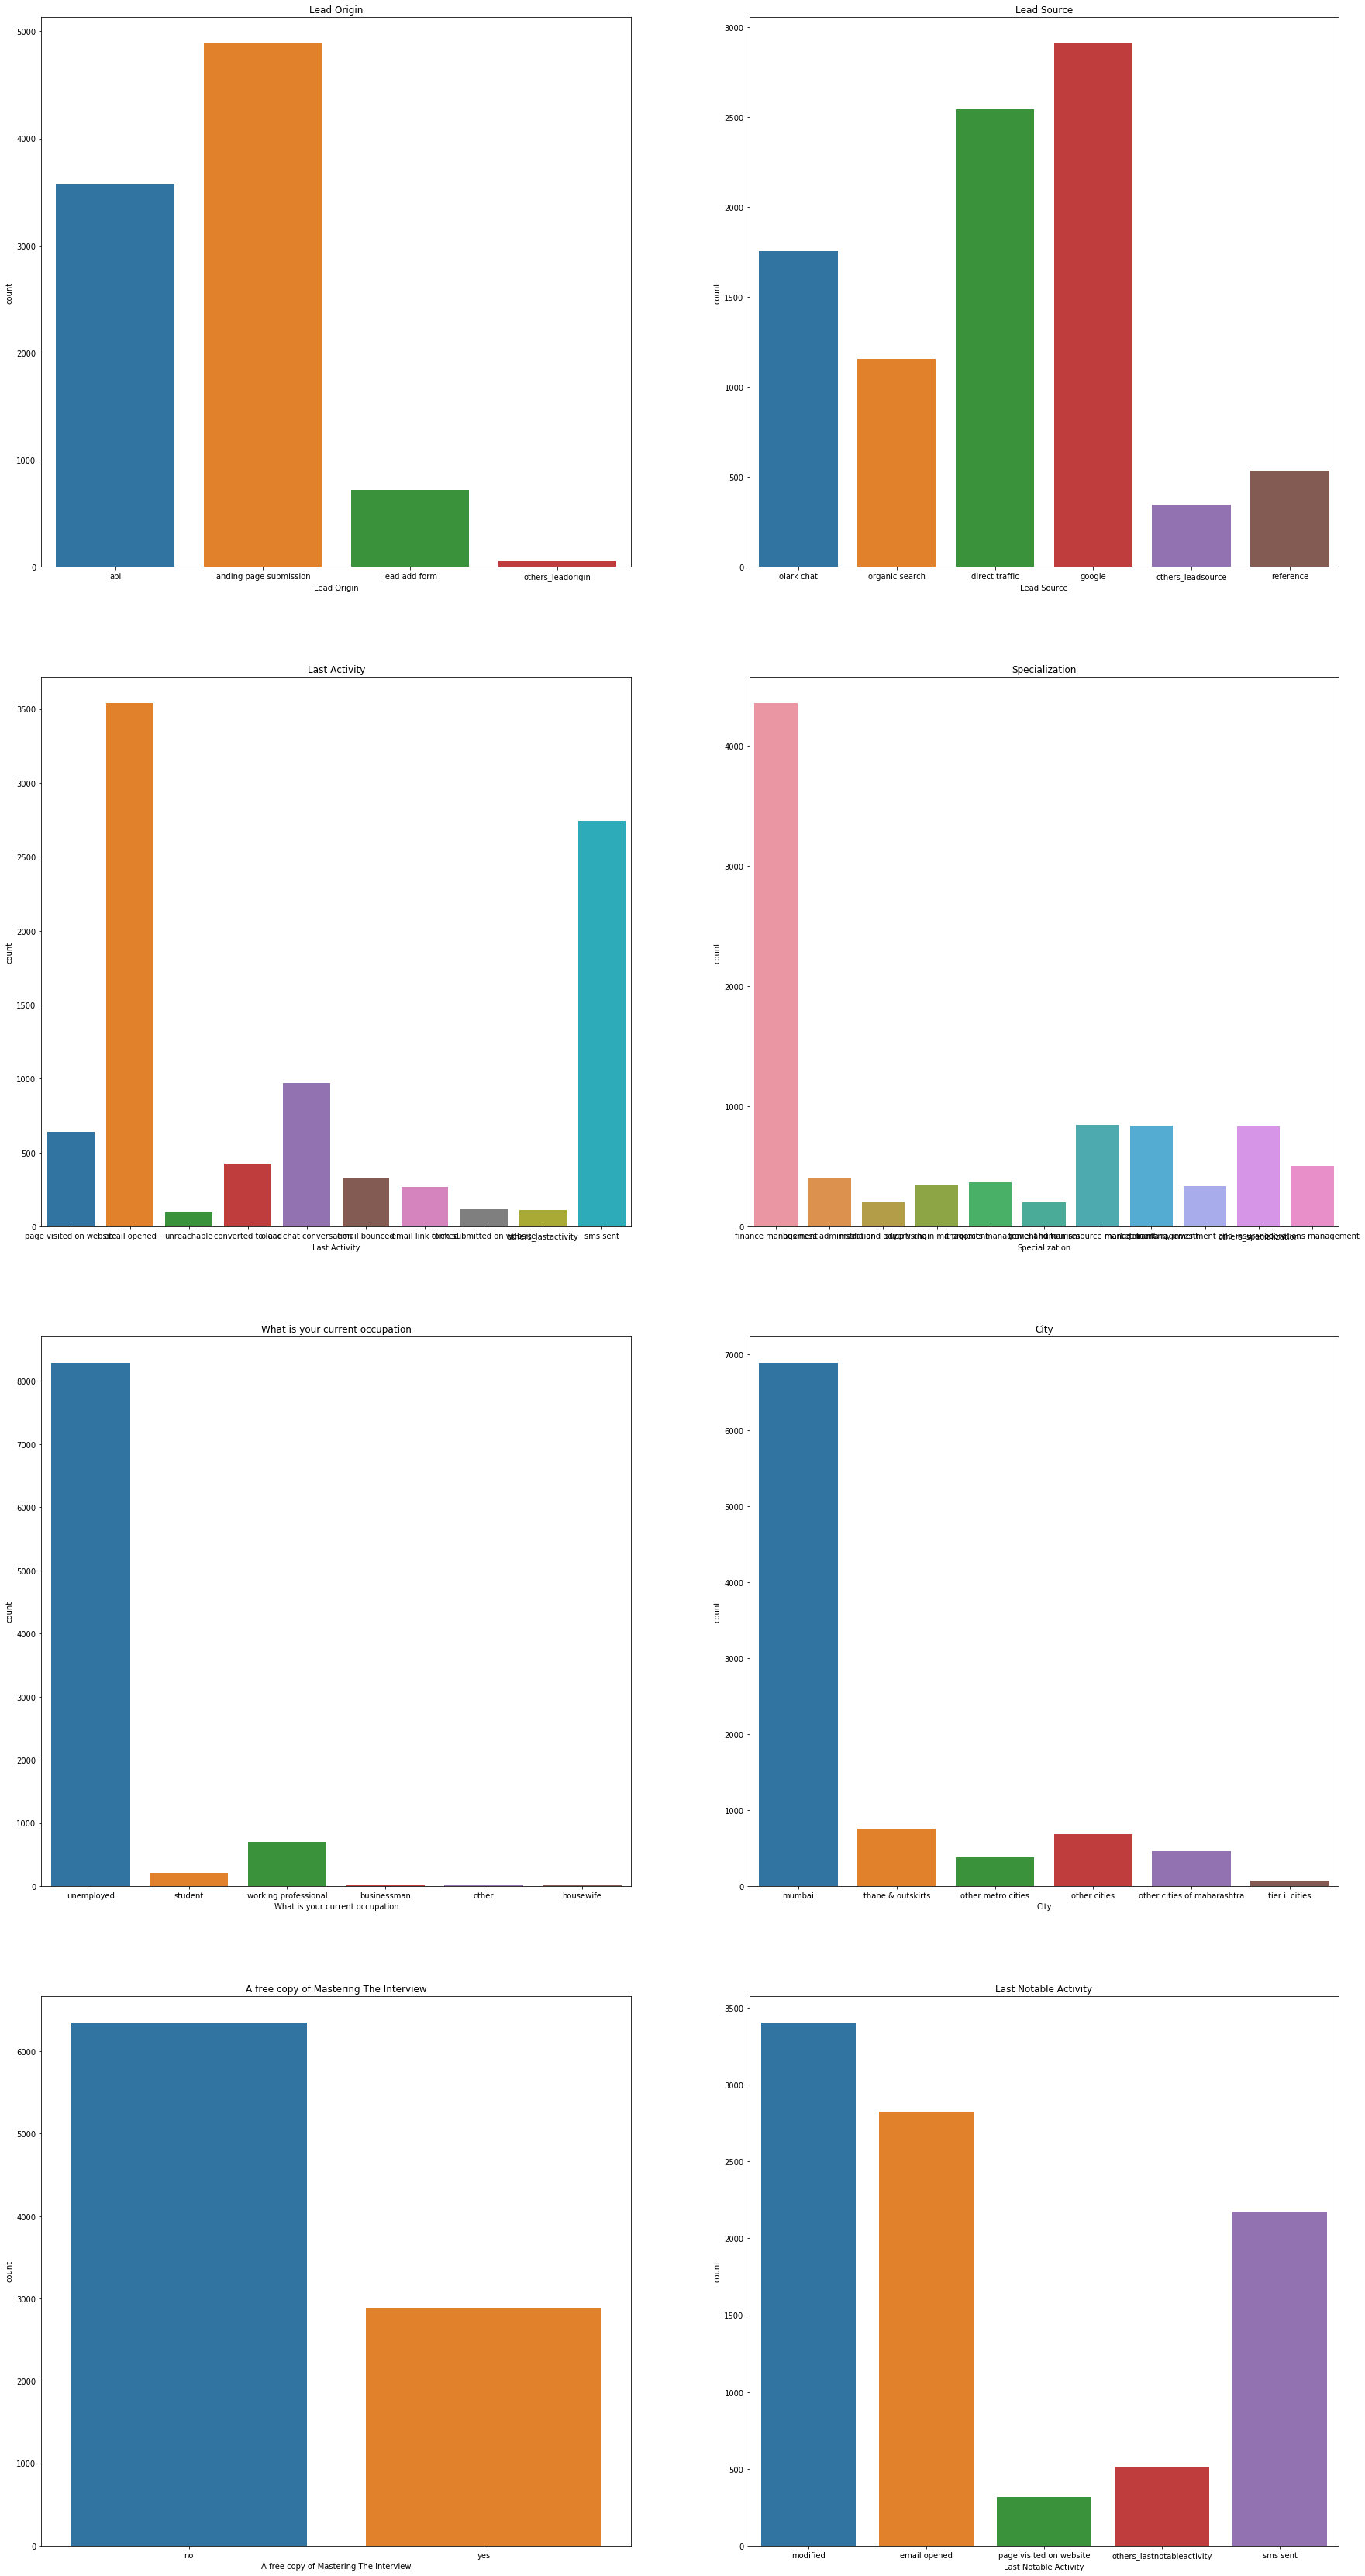

In [42]:
# Visualizing the Univariate analysis of the Categorical Variables
plt.figure(figsize = (30,60))

plt.subplot(4,2,1)
sns.countplot(df2['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(4,2,2)
sns.countplot(df2['Lead Source'])
plt.title('Lead Source')

plt.subplot(4,2,3)
sns.countplot(df2['Last Activity'])
plt.title('Last Activity')

plt.subplot(4,2,4)
sns.countplot(df2['Specialization'])
plt.title('Specialization')

plt.subplot(4,2,5)
sns.countplot(df2['What is your current occupation'])
plt.title('What is your current occupation')

plt.subplot(4,2,6)
sns.countplot(df2['City'])
plt.title('City')

plt.subplot(4,2,7)
sns.countplot(df2['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(4,2,8)
sns.countplot(df2['Last Notable Activity'])
plt.title('Last Notable Activity')

plt.show()

## Inference

Basis the inference from the above graph concerning the contributing factors for each variables mentioned are the below:      
1) Lead Origin: Landing page submission & api                                                                         
2) Lead Source: google, direct traffic and olark chart                                                         
3) Lead Activity: email opened and sms sent                                                                
4) Specialization: Finance management, human resource, marketing management and operations management                       
5) Current occupation: Unemployed and working professionals                                             
6) City: mumbai, thane & outskirts & other cities                                                             
7) A free copy of mastering the interview: not many customers have accepted for this option                                
8) Last Notable Activity: Modified, email opened & sms sent                                                

In [43]:
# Considering Continuous Variables
continous_data = df2.select_dtypes(include=[np.number])
continous_data

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0.0,0,0.00
1,0,5.0,674,2.50
2,1,2.0,1532,2.00
3,0,1.0,305,1.00
4,1,2.0,1428,1.00
...,...,...,...,...
9235,1,8.0,1845,2.67
9236,0,2.0,238,2.00
9237,0,2.0,199,2.00
9238,1,3.0,499,3.00


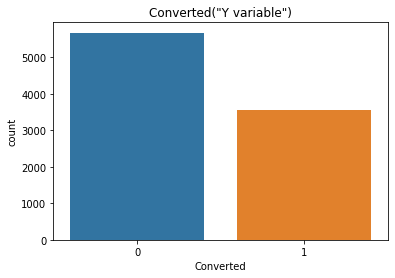

In [44]:
# Visualizing the Target Variable
sns.countplot(df2['Converted'])
plt.title('Converted("Y variable")')
plt.show()

## Inference
We infer that 38.5% is the actual average conversion rate.

In [45]:
df2.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


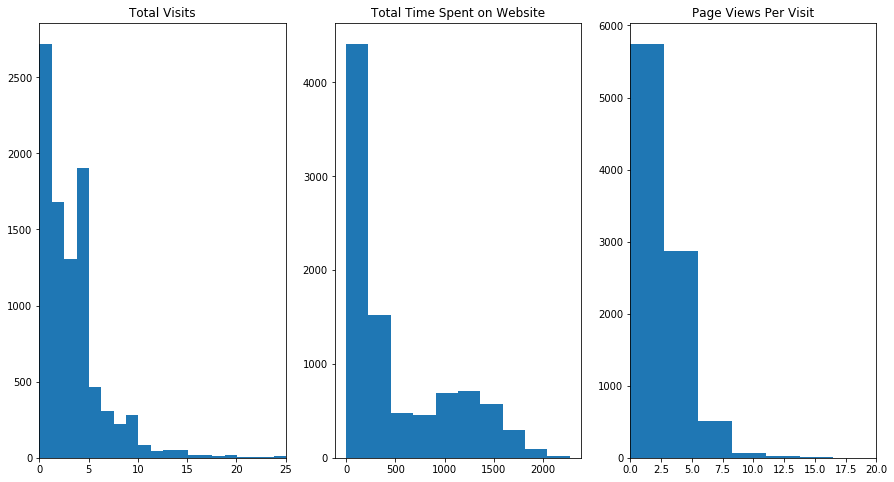

In [46]:
# Visualizing the numerical variables
plt.figure(figsize = (15,8))
plt.subplot(131)
plt.hist(df2['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(132)
plt.hist(df2['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(133)
plt.hist(df2['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)

plt.show()

## Inference

The average number of pages viewed during the visit is approximately 2.5.                                          
The average number of visits made by the customer on the website is approximately 3.5.                            
We infer that of the total time spent by the customer on the website on an average is 487.6.                        

## 2.2 Bivariate Analysis

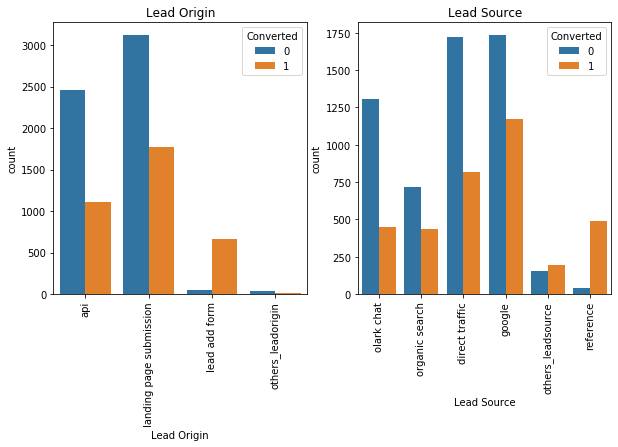

In [47]:
# Bivariate Visualizing of the 'Lead Origin' & 'Lead Source'
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.show()

## Inference

For lead origin the highest conversion was observed from the "Landing page submission' followed by "api" and "lead add form"  
For lead source the highest conversion was observed from the "google", "direct traffic" & "olark chart"

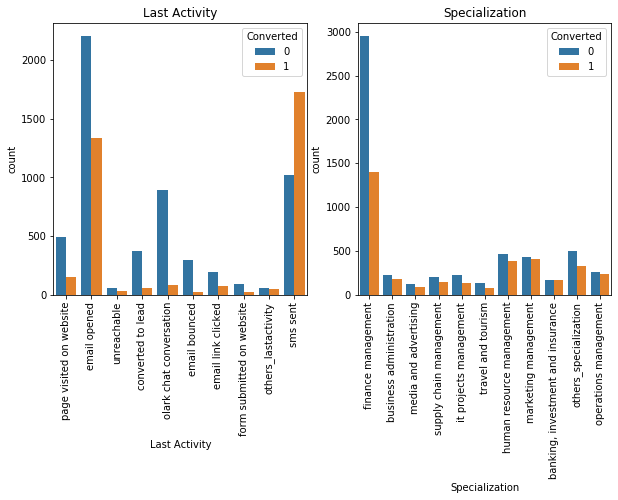

In [48]:
# Bivariate Visualizing of the 'Last Activity' & Specialization'
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Specialization', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.show()

## Inference

For Last Activity highest conversion was observed for "sms sent" followed by "email opened".                     
For Specialization highest conversion was observed for "Finance management", "Human resource management" and "Marketing Management"

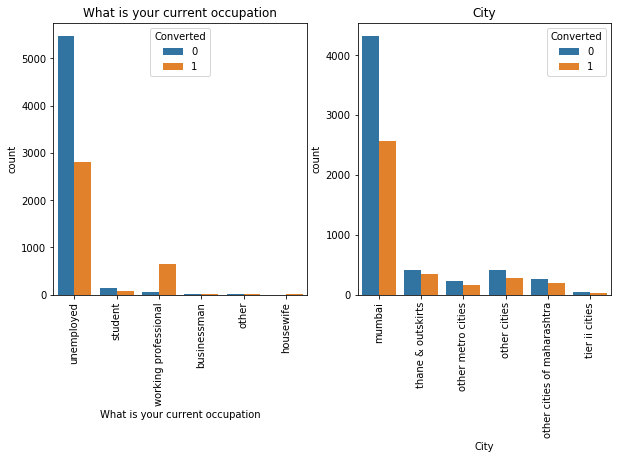

In [49]:
# Bivariate Visualizing of the 'What is your current occupation' & 'City'
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What is your current occupation', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.subplot(1,2,2)
sns.countplot(x='City', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('City')

plt.show()

## Inference

Working professionals and unemployed has the highest conversion rates.                                                  
Mumbai and "Thane & outskirts" residents were were more likely to be successfully converted.

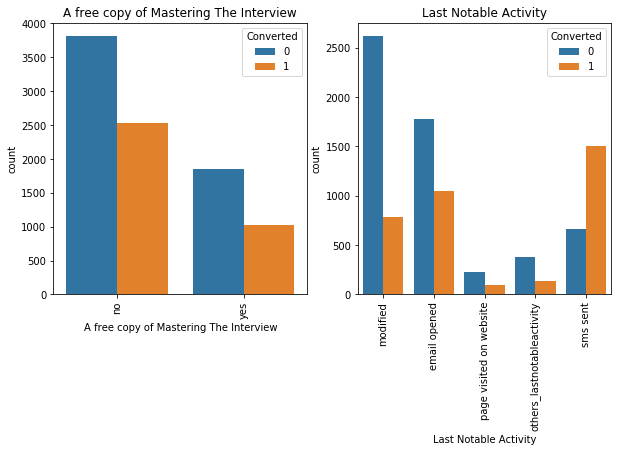

In [50]:
# Bivariate Visualizing of the 'A free copy of Mastering The Interview' & 'Last Notable Activity'
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.subplot(1,2,2)
sns.countplot(x='Last Notable Activity', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

## Inference

In both the cases of the rejection rate for "A free copy of Mastering The Interview" was high. Leads who rejected were more likely to be converted.                                                                           
For the last notable activity performed the leads who were converted was "sms sent", "email opened" and "modified"

In [51]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df2.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
99%,1.000000,17.000000,1840.610000,9.000000
max,1.000000,251.000000,2272.000000,55.000000


In [52]:
outliers = df2[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
outliers.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.97,0.98,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.394156,487.698268,2.327787
std,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
97%,11.000000,1660.000000,7.000000


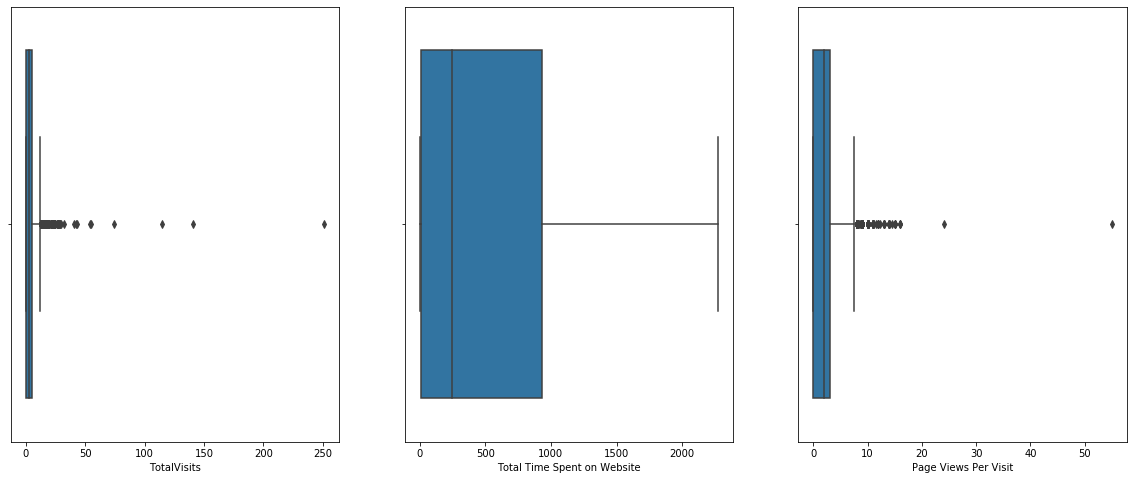

In [53]:
# Checking the outliers and analysis as well
df3 = df2[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
plt.figure(figsize = (20,8))
feature = df3.columns[0:]
for i in enumerate(feature):
    plt.subplot(1,3, i[0]+1)
    sns.boxplot(df3[i[1]])

## Inference

We infer from the above table and the graph that the variables 'TotalVisits' & 'Page Views Per Visit' have outliers.

In [54]:
# Capping of outliers of variables Total Visits and Page Views Per Visit
q4 = df3['TotalVisits'].quantile(0.98)
df3['TotalVisits'][df3['TotalVisits']>=q4] =q4

q4 = df3['Page Views Per Visit'].quantile(0.98)
df3['Page Views Per Visit'][df3['Page Views Per Visit']>=q4] =q4

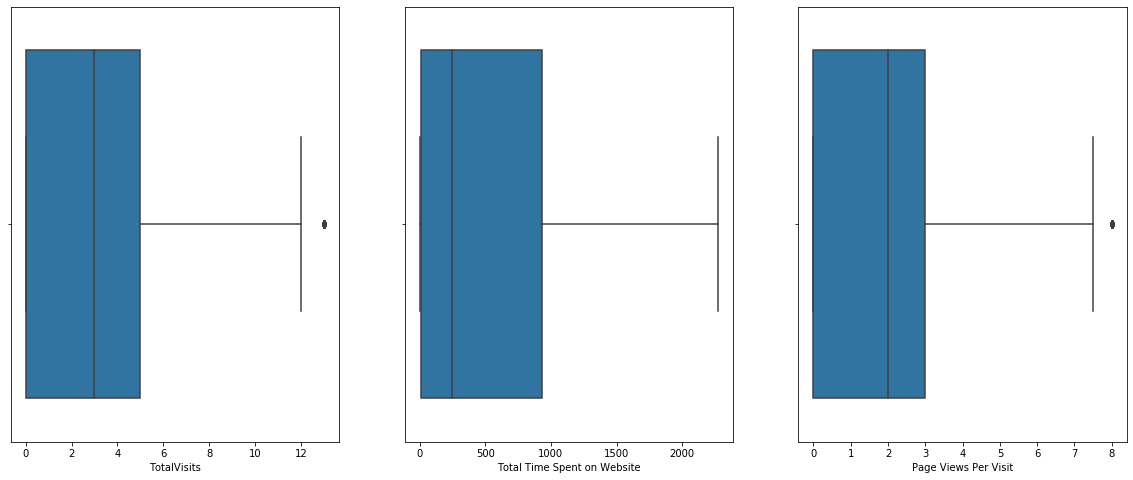

In [55]:
# Chekcing the outliers post capping at 98% quartile for the variables namely "TotalVisits" & "Page Views Per Visit"
plt.figure(figsize = (20,8))
feature = df3.columns[0:]
for i in enumerate(feature):
    plt.subplot(1,3, i[0]+1)
    sns.boxplot(df3[i[1]])

In [56]:
df3.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.97,0.98,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.225866,487.698268,2.286297
std,3.042998,548.021466,1.949767
min,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
97%,11.000000,1660.000000,7.000000


## Inference

The higher range outliers have been capped at 98% for "TotalVisits" & "Page Views Per Visit" respectively.

In [57]:
# Finding some correlation for numerical columns
corr1=df2.iloc[0:,2:]
corr1=corr1.corr(method='spearman')
corr1

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.020723,0.255571,-0.016733
TotalVisits,0.020723,1.000000,0.560135,0.856153
Total Time Spent on Website,0.255571,0.560135,1.000000,0.545988
Page Views Per Visit,-0.016733,0.856153,0.545988,1.000000


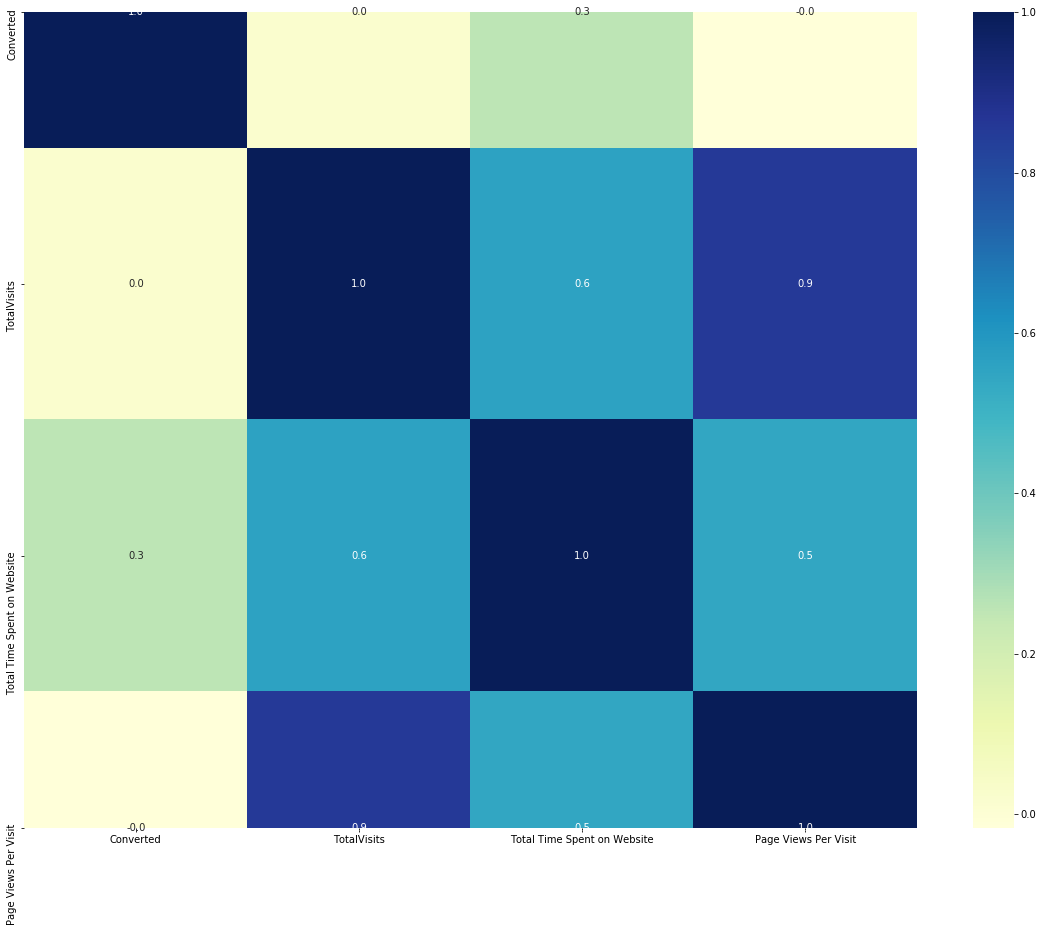

In [58]:
# Plotting a Heat Map to Visualize the correlations amongst the variables.
plt.figure(figsize=(20,15))
sns.heatmap(corr1, annot=True,cmap="YlGnBu", fmt=".1f")
plt.show()

## Inference

We can infer that the variables TotalVisits and Page views per visit are positively correlated.
We can also observe that the target variable "converted" is less correlated with any variable "Total time spent on website" and hence will be of less relevance to our analysis.

In [59]:
df2.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,0,0.0,0,0.0,page visited on website,finance management,unemployed,mumbai,no,modified
1,api,organic search,0,5.0,674,2.5,email opened,finance management,unemployed,mumbai,no,email opened
2,landing page submission,direct traffic,1,2.0,1532,2.0,email opened,business administration,student,mumbai,yes,email opened
3,landing page submission,direct traffic,0,1.0,305,1.0,unreachable,media and advertising,unemployed,mumbai,no,modified
4,landing page submission,google,1,2.0,1428,1.0,converted to lead,finance management,unemployed,mumbai,no,modified


# 3. Dummy Variables

In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Last Activity                             9240 non-null object
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
City                                      9240 non-null object
A free copy of Mastering The Interview    9240 non-null object
Last Notable Activity                     9240 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 866.4+ KB


In [61]:
df2.shape

(9240, 12)

In [62]:
df2.loc[:, df2.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [63]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df2[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df3 = pd.concat([df2, dummy], axis=1)
df3

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_others_leadorigin,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_others_leadsource,Lead Source_reference,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_others_lastactivity,Last Activity_page visited on website,Last Activity_sms sent,Last Activity_unreachable,Specialization_business administration,Specialization_finance management,Specialization_human resource management,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_others_specialization,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,A free copy of Mastering The Interview_yes,Last Notable Activity_modified,Last Notable Activity_others_lastnotableactivity,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
0,api,olark chat,0,0.0,0,0.00,page visited on website,finance management,unemployed,mumbai,no,modified,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,api,organic search,0,5.0,674,2.50,email opened,finance management,unemployed,mumbai,no,email opened,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,1,2.0,1532,2.00,email opened,business administration,student,mumbai,yes,email opened,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,landing page submission,direct traffic,0,1.0,305,1.00,unreachable,media and advertising,unemployed,mumbai,no,modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,landing page submission,google,1,2.0,1428,1.00,converted to lead,finance management,unemployed,mumbai,no,modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,1,8.0,1845,2.67,others_lastactivity,it projects management,unemployed,mumbai,no,others_lastnotableactivity,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
9236,landing page submission,direct traffic,0,2.0,238,2.00,sms sent,media and advertising,unemployed,mumbai,yes,sms sent,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
9237,landing page submission,direct traffic,0,2.0,199,2.00,sms sent,business administration,unemployed,mumbai,yes,sms sent,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
9238,landing page submission,google,1,3.0,499,3.00,sms sent,human resource management,unemployed,other metro cities,no,sms sent,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [64]:
# Listing of variables to map
df3['A free copy of Mastering The Interview']=pd.Series(np.where(df3['A free copy of Mastering The Interview'].values == 'yes', 1, 0), df3.index)

In [65]:
df3 = df3.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df3

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_others_leadorigin,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_others_leadsource,Lead Source_reference,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_others_lastactivity,Last Activity_page visited on website,Last Activity_sms sent,Last Activity_unreachable,Specialization_business administration,Specialization_finance management,Specialization_human resource management,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_others_specialization,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,A free copy of Mastering The Interview_yes,Last Notable Activity_modified,Last Notable Activity_others_lastnotableactivity,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
0,0,0.0,0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
9237,0,2.0,199,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
9238,1,3.0,499,3.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [66]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 46 columns):
Converted                                               9240 non-null int64
TotalVisits                                             9240 non-null float64
Total Time Spent on Website                             9240 non-null int64
Page Views Per Visit                                    9240 non-null float64
Lead Origin_landing page submission                     9240 non-null uint8
Lead Origin_lead add form                               9240 non-null uint8
Lead Origin_others_leadorigin                           9240 non-null uint8
Lead Source_google                                      9240 non-null uint8
Lead Source_olark chat                                  9240 non-null uint8
Lead Source_organic search                              9240 non-null uint8
Lead Source_others_leadsource                           9240 non-null uint8
Lead Source_reference                                

## 4. Test-Train Split

In [67]:
# Import the required library
from sklearn.model_selection import train_test_split

In [68]:
X = df3.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_others_leadorigin,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_others_leadsource,Lead Source_reference,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_others_lastactivity,Last Activity_page visited on website,Last Activity_sms sent,Last Activity_unreachable,Specialization_business administration,Specialization_finance management,Specialization_human resource management,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_others_specialization,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,A free copy of Mastering The Interview_yes,Last Notable Activity_modified,Last Notable Activity_others_lastnotableactivity,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [69]:
# Putting the target variable in y
y = df3['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [70]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [71]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_others_leadorigin,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_others_leadsource,Lead Source_reference,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_others_lastactivity,Last Activity_page visited on website,Last Activity_sms sent,Last Activity_unreachable,Specialization_business administration,Specialization_finance management,Specialization_human resource management,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_others_specialization,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,A free copy of Mastering The Interview_yes,Last Notable Activity_modified,Last Notable Activity_others_lastnotableactivity,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
3112,2.0,412,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8413,5.0,1531,5.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2961,3.0,1248,1.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
24,6.0,1137,1.5,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2740,3.0,1003,3.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [72]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_others_leadorigin,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_others_leadsource,Lead Source_reference,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_others_lastactivity,Last Activity_page visited on website,Last Activity_sms sent,Last Activity_unreachable,Specialization_business administration,Specialization_finance management,Specialization_human resource management,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_others_specialization,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,A free copy of Mastering The Interview_yes,Last Notable Activity_modified,Last Notable Activity_others_lastnotableactivity,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,3.359926,486.222016,2.292146,0.523346,0.079932,0.005566,0.315553,0.193568,0.123377,0.035714,0.060142,0.036178,0.027675,0.383890,0.011596,0.103587,0.011596,0.069419,0.298547,0.009586,0.044063,0.470161,0.093228,0.036951,0.091373,0.023036,0.051948,0.089981,0.040507,0.021954,0.000773,0.001082,0.023191,0.893939,0.080241,0.072047,0.050093,0.038652,0.079777,0.007730,0.307359,0.369821,0.052566,0.035714,0.237941
std,5.054490,548.317095,2.084597,0.499493,0.271209,0.074403,0.464772,0.395125,0.328894,0.185591,0.237769,0.186748,0.164052,0.486369,0.107065,0.304747,0.107065,0.254184,0.457656,0.097444,0.205251,0.499147,0.290774,0.188656,0.288161,0.150031,0.221939,0.286177,0.197161,0.146545,0.027795,0.032882,0.150522,0.307939,0.271687,0.258586,0.218153,0.192779,0.270969,0.087589,0.461435,0.482793,0.223184,0.185591,0.425856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,250.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0000

In [73]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_others_leadorigin,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_others_leadsource,Lead Source_reference,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_others_lastactivity,Last Activity_page visited on website,Last Activity_sms sent,Last Activity_unreachable,Specialization_business administration,Specialization_finance management,Specialization_human resource management,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_others_specialization,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,A free copy of Mastering The Interview_yes,Last Notable Activity_modified,Last Notable Activity_others_lastnotableactivity,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
3112,0.007968,0.182867,0.083333,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8413,0.019920,0.679538,0.208333,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2961,0.011952,0.553928,0.041667,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
24,0.023904,0.504660,0.062500,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2740,0.011952,0.445184,0.125000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [74]:
# Finding some correlation for numerical columns
corr2 = X_train.corr(method='spearman')
corr2

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_others_leadorigin,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_others_leadsource,Lead Source_reference,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_others_lastactivity,Last Activity_page visited on website,Last Activity_sms sent,Last Activity_unreachable,Specialization_business administration,Specialization_finance management,Specialization_human resource management,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_others_specialization,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,A free copy of Mastering The Interview_yes,Last Notable Activity_modified,Last Notable Activity_others_lastnotableactivity,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
TotalVisits,1.000000,0.572596,0.862106,0.541370,-0.357734,-0.091836,0.297364,-0.577956,0.304766,-0.075891,-0.306796,-0.065597,-0.030658,0.061993,0.023949,-0.244035,0.023021,0.222546,0.033918,0.032095,0.083361,-0.373301,0.104176,0.063209,0.061249,0.090192,0.073181,0.131760,0.064322,0.097310,-0.016720,-0.002186,-0.022801,0.028129,-0.016876,0.104162,0.077843,0.078876,0.112051,0.025886,0.321449,-0.183144,-0.038684,0.184121,0.031021
Total Time Spent on Website,0.572596,1.000000,0.559192,0.432360,-0.249440,-0.040901,0.286104,-0.576726,0.157614,-0.062379,-0.206945,-0.003414,-0.047222,0.032085,0.026615,-0.263208,0.021164,0.080974,0.082348,0.015043,0.072114,-0.318690,0.079699,0.061360,0.070159,0.065867,0.076317,0.103124,0.072396,0.059924,0.001023,0.023688,-0.000971,-0.055190,0.058855,0.088244,0.086324,0.075884,0.095242,0.027471,0.267175,-0.094192,-0.060055,0.060726,0.084134
Page Views Per Visit,0.862106,0.559192,1.000000,0.600383,-0.362187,-0.091364,0.299392,-0.600291,0.295589,-0.084802,-0.310948,-0.042077,-0.032628,0.052151,0.025714,-0.267776,0.028462,0.130852,0.084713,0.039987,0.075464,-0.400993,0.102554,0.076919,0.072285,0.093946,0.080944,0.138679,0.072272,0.110671,-0.010999,-0.000499,-0.027060,0.033616,-0.022049,0.102822,0.098687,0.105630,0.109730,0.030656,0.319193,-0.147149,-0.061232,0.053000,0.074218
Lead Origin_landing page submission,0.541370,0.432360,0.600383,1.000000,-0.308847,-0.078392,0.093153,-0.513365,0.050235,-0.154950,-0.265064,0.058911,-0.022039,0.023253,0.042647,-0.298294,0.022406,0.086494,0.064545,0.033525,0.130989,-0.600049,0.155890,0.140991,0.131822,0.113532,0.134125,0.194082,0.127001,0.111296,-0.006869,-0.006246,0.009251,0.006047,-0.008679,0.171343,0.159555,0.156031,0.149612,0.080701,0.570659,-0.103136,-0.060945,0.040212,0.057844
Lead Origin_lead add form,-0.357734,-0.249440,-0.362187,-0.308847,1.000000,-0.022051,-0.163330,-0.142963,-0.110576,0.241270,0.858239,-0.026574,0.005881,0.013515,-0.010623,-0.096454,0.005353,-0.046857,0.117918,-0.005592,-0.007724,0.025046,0.030983,-0.033558,0.039098,-0.037660,-0.017616,-0.030922,-0.022967,-0.036379,0.053341,0.007638,0.003827,-0.191015,0.206742,-0.051260,-0.044164,-0.053186,0.005797,-0.019506,-0.181517,-0.017947,-0.028553,-0.022931,0.097715
Lead Origin_others_leadorigin,-0.091836,-0.040901,-0.091364,-0.078392,-0.022051,1.000000,-0.046326,-0.036653,-0.028066,0.377542,-0.018925,-0.003366,-0.012622,0.069139,-0.008103,-0.025432,-0.008103,-0.020433,-0.026101,-0.007360,-0.016062,0.058601,-0.016841,-0.014654,-0.023724,-0.011488,-0.008148,-0.

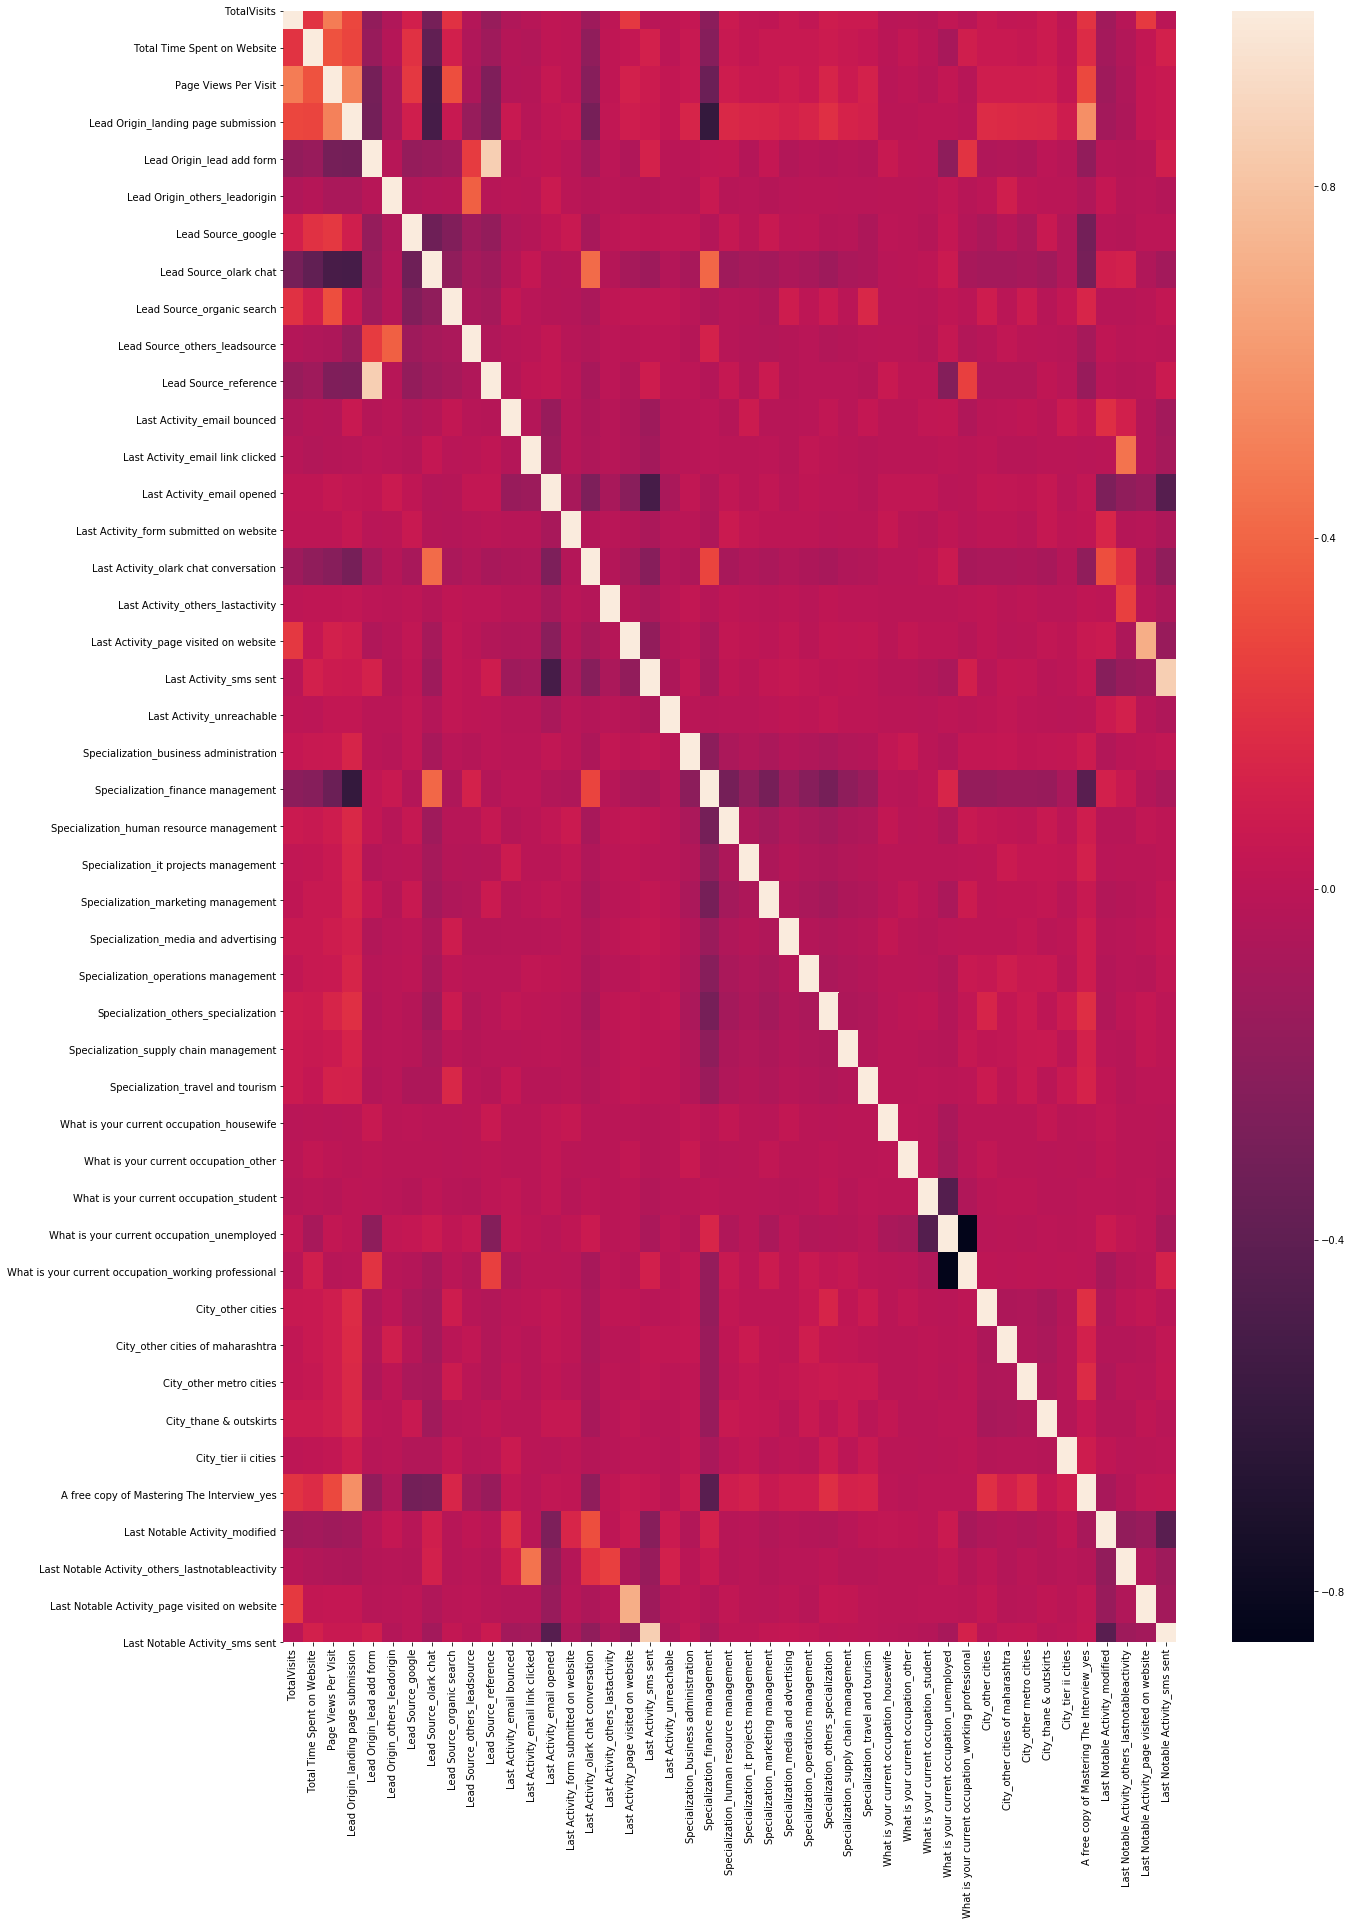

In [75]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

As there are a lot of variables it is difficult to drop variables hence we will do that after performing RFE.

# 5. Model Building 

In [76]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [77]:
# Import RFE
from sklearn.feature_selection import RFE

In [78]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [79]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_landing page submission', False, 4),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_others_leadorigin', False, 28),
 ('Lead Source_google', False, 9),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 20),
 ('Lead Source_others_leadsource', False, 8),
 ('Lead Source_reference', False, 3),
 ('Last Activity_email bounced', True, 1),
 ('Last Activity_email link clicked', False, 21),
 ('Last Activity_email opened', False, 7),
 ('Last Activity_form submitted on website', False, 29),
 ('Last Activity_olark chat conversation', True, 1),
 ('Last Activity_others_lastactivity', False, 6),
 ('Last Activity_page visited on website', False, 18),
 ('Last Activity_sms sent', True, 1),
 ('Last Activity_unreachable', False, 2),
 ('Specialization_business administration', False, 15),
 ('Specialization_finance management', False, 5),
 ('Specializatio

In [80]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

All the variables have been selected by using RFE, with subsequent computation of p-values and the VIFs 

In [81]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [82]:
# Importing statsmodels
import statsmodels.api as sm

In [83]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2742.4
Date:                Tue, 08 Sep 2020   Deviance:                       5484.8
Time:                        21:31:02   Pearson chi2:                 7.18e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4858      1.527     -0.318      0.750      -3.479       2.507
TotalVisits                                              6.5763      2.668      2.465      0.014       1.348      11.805
Total Time Spent on Website                              4.5560      0.162     28.163      0.000       4.239       4.873
Page Views Per Visit                                    -1.5499      0.557     -2.781      0.005      -2.642      -0.457
Lead Origin_lead add form                                3.9857      0.199     20.012      0.000       3.595       4.376
Lead Source_olark chat                                   1.0535      0.118      8.949      0.000       0.823       1.284
Last Activity_email bounced                             -1.6053      0.303     -5.294      0.000      -2.200      -1.011
Last Activity_olark chat conversation                   -0.9958      0.162     -6.132      0.000      -1.314      -0.678
Last Activity_sms sent                                   0.7251      0.153      4.750      0.000       0.426       1.024
What is your current occupation_housewife               21.0584   1.79e+04      0.001      0.999   -3.51e+04    3.51e+04
What is your current occupation_other                   -1.4207      1.725     -0.823      0.410      -4.802       1.961
What is your current occupation_student                 -1.2944      1.537     -0.842      0.400      -4.306       1.717
What is your current occupation_unemployed              -1.7096      1.523     -1.123      0.262      -4.694       1.275
What is your current occupation_working professional     1.1212      1.533      0.731      0.465      -1.883       4.126
Last Notable Activity_modified                          -0.6287      0.094     -6.717      0.000      -0.812      -0.445
Last Notable Activity_sms sent                           0.6408      0.172      3.718      0.000       0.303       0.979
========================================================================================================================
"""

In [84]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_unemployed,7.49
14,Last Notable Activity_sms sent,6.57
7,Last Activity_sms sent,6.36
2,Page Views Per Visit,4.27
13,Last Notable Activity_modified,2.55
4,Lead Source_olark chat,2.39
1,Total Time Spent on Website,2.27
0,TotalVisits,1.93
12,What is your current occupation_working profes...,1.75
6,Last Activity_olark chat conversation,1.61


## Inference:
The p-values of "What is your current occupation_housewife","What is your current occupation_student" & "What is your current occupation_student" are very high. Hence we will start by removing "What is your current occupation_housewife".           
The VIF is also high for a few variables. However, we will start by removing the variables with high p-values first. 

In [86]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [87]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Tue, 08 Sep 2020   Deviance:                       5486.2
Time:                        21:31:02   Pearson chi2:                 7.18e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6325      1.216      0.520      0.603      -1.751       3.016
TotalVisits                                              6.5728      2.667      2.465      0.014       1.346      11.800
Total Time Spent on Website                              4.5551      0.162     28.157      0.000       4.238       4.872
Page Views Per Visit                                    -1.5527      0.558     -2.785      0.005      -2.646      -0.460
Lead Origin_lead add form                                3.9843      0.199     20.009      0.000       3.594       4.375
Lead Source_olark chat                                   1.0519      0.118      8.935      0.000       0.821       1.283
Last Activity_email bounced                             -1.6065      0.303     -5.299      0.000      -2.201      -1.012
Last Activity_olark chat conversation                   -1.0020      0.162     -6.167      0.000      -1.321      -0.684
Last Activity_sms sent                                   0.7232      0.153      4.738      0.000       0.424       1.022
What is your current occupation_other                   -2.5388      1.458     -1.741      0.082      -5.397       0.320
What is your current occupation_student                 -2.4116      1.229     -1.961      0.050      -4.821      -0.002
What is your current occupation_unemployed              -2.8270      1.212     -2.333      0.020      -5.202      -0.452
What is your current occupation_working professional     0.0036      1.224      0.003      0.998      -2.396       2.403
Last Notable Activity_modified                          -0.6267      0.094     -6.697      0.000      -0.810      -0.443
Last Notable Activity_sms sent                           0.6428      0.172      3.729      0.000       0.305       0.981
========================================================================================================================
"""

In [88]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_unemployed,7.45
13,Last Notable Activity_sms sent,6.57
7,Last Activity_sms sent,6.35
2,Page Views Per Visit,4.26
12,Last Notable Activity_modified,2.55
4,Lead Source_olark chat,2.39
1,Total Time Spent on Website,2.27
0,TotalVisits,1.93
11,What is your current occupation_working profes...,1.74
6,Last Activity_olark chat conversation,1.61


## Inference
We see that the VIFs are a little high. However we will first drop the variable "What is your current occupation_working professional" which has a higher P-Value to see how it impacts the VIF.

In [89]:
X_train.drop('What is your current occupation_working professional', axis = 1, inplace = True)

In [90]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Tue, 08 Sep 2020   Deviance:                       5486.2
Time:                        21:31:02   Pearson chi2:                 7.18e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.6360      0.199      3.195      0.001       0.246       1.026
TotalVisits                                    6.5729      2.667      2.465      0.014       1.346      11.800
Total Time Spent on Website                    4.5551      0.162     28.158      0.000       4.238       4.872
Page Views Per Visit                          -1.5527      0.558     -2.785      0.005      -2.646      -0.460
Lead Origin_lead add form                      3.9843      0.199     20.010      0.000       3.594       4.375
Lead Source_olark chat                         1.0519      0.118      8.936      0.000       0.821       1.283
Last Activity_email bounced                   -1.6065      0.303     -5.299      0.000      -2.201      -1.012
Last Activity_olark chat conversation         -1.0021      0.162     -6.169      0.000      -1.320      -0.684
Last Activity_sms sent                         0.7232      0.153      4.739      0.000       0.424       1.022
What is your current occupation_other         -2.5423      0.833     -3.051      0.002      -4.175      -0.909
What is your current occupation_student       -2.4151      0.277     -8.733      0.000      -2.957      -1.873
What is your current occupation_unemployed    -2.8305      0.182    -15.515      0.000      -3.188      -2.473
Last Notable Activity_modified                -0.6267      0.094     -6.700      0.000      -0.810      -0.443
Last Notable Activity_sms sent                 0.6427      0.172      3.730      0.000       0.305       0.981
==============================================================================================================
"""

In [91]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_sms sent,6.46
7,Last Activity_sms sent,6.35
10,What is your current occupation_unemployed,4.98
2,Page Views Per Visit,3.74
11,Last Notable Activity_modified,2.42
1,Total Time Spent on Website,2.04
4,Lead Source_olark chat,2.04
0,TotalVisits,1.92
6,Last Activity_olark chat conversation,1.61
3,Lead Origin_lead add form,1.22


## Inference
The VIFs of "Last Notable Activity_sms sent" is on the higher side. Hence, we will try to remove the variable to see if there are any changes in the VIF again.

In [92]:
X_train.drop('Last Notable Activity_sms sent', axis = 1, inplace = True)

In [93]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2750.2
Date:                Tue, 08 Sep 2020   Deviance:                       5500.3
Time:                        21:31:03   Pearson chi2:                 7.10e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.7169      0.198      3.613      0.000       0.328       1.106
TotalVisits                                    6.0465      2.566      2.357      0.018       1.017      11.075
Total Time Spent on Website                    4.5570      0.162     28.187      0.000       4.240       4.874
Page Views Per Visit                          -1.5521      0.553     -2.805      0.005      -2.637      -0.468
Lead Origin_lead add form                      3.9660      0.199     19.914      0.000       3.576       4.356
Lead Source_olark chat                         1.0387      0.117      8.853      0.000       0.809       1.269
Last Activity_email bounced                   -1.5354      0.303     -5.070      0.000      -2.129      -0.942
Last Activity_olark chat conversation         -0.9156      0.161     -5.683      0.000      -1.231      -0.600
Last Activity_sms sent                         1.2206      0.074     16.601      0.000       1.076       1.365
What is your current occupation_other         -2.5058      0.829     -3.021      0.003      -4.132      -0.880
What is your current occupation_student       -2.4334      0.277     -8.786      0.000      -2.976      -1.891
What is your current occupation_unemployed    -2.8477      0.183    -15.563      0.000      -3.206      -2.489
Last Notable Activity_modified                -0.8201      0.079    -10.377      0.000      -0.975      -0.665
==============================================================================================================
"""

In [94]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_unemployed,4.91
2,Page Views Per Visit,3.73
4,Lead Source_olark chat,2.04
1,Total Time Spent on Website,2.03
0,TotalVisits,1.92
11,Last Notable Activity_modified,1.85
6,Last Activity_olark chat conversation,1.56
7,Last Activity_sms sent,1.54
3,Lead Origin_lead add form,1.22
5,Last Activity_email bounced,1.11


## Inference
We infer that the P-values are fine however the VIF of the variable is highly correlated "What is your current occupation_unemployed". Hence we shall remove the variable and check again.

In [95]:
X_train.drop('What is your current occupation_unemployed', axis = 1, inplace = True)

In [96]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2936.5
Date:                Tue, 08 Sep 2020   Deviance:                       5873.0
Time:                        21:31:03   Pearson chi2:                 6.67e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.9507      0.094    -20.660      0.000      -2.136      -1.766
TotalVisits                                 5.2159      2.366      2.205      0.027       0.579       9.853
Total Time Spent on Website                 4.6357      0.157     29.449      0.000       4.327       4.944
Page Views Per Visit                       -1.4090      0.527     -2.675      0.007      -2.442      -0.376
Lead Origin_lead add form                   4.1442      0.195     21.288      0.000       3.763       4.526
Lead Source_olark chat                      0.9938      0.113      8.796      0.000       0.772       1.215
Last Activity_email bounced                -1.6349      0.303     -5.404      0.000      -2.228      -1.042
Last Activity_olark chat conversation      -0.9739      0.158     -6.168      0.000      -1.283      -0.664
Last Activity_sms sent                      1.1848      0.071     16.751      0.000       1.046       1.323
What is your current occupation_other       0.1117      0.816      0.137      0.891      -1.487       1.711
What is your current occupation_student     0.2311      0.215      1.074      0.283      -0.191       0.653
Last Notable Activity_modified             -0.8237      0.076    -10.825      0.000      -0.973      -0.675
===========================================================================================================
"""

In [97]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.84
0,TotalVisits,1.89
1,Total Time Spent on Website,1.89
10,Last Notable Activity_modified,1.68
6,Last Activity_olark chat conversation,1.56
7,Last Activity_sms sent,1.49
4,Lead Source_olark chat,1.47
3,Lead Origin_lead add form,1.13
5,Last Activity_email bounced,1.10
9,What is your current occupation_student,1.02


## Inference:
We observe that the p value of 'What is your current occupation_other' is on the higher side. Hence, we will remove the varaible and run the model again.

In [98]:
X_train.drop('What is your current occupation_other', axis = 1, inplace = True)

In [99]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2936.5
Date:                Tue, 08 Sep 2020   Deviance:                       5873.0
Time:                        21:31:03   Pearson chi2:                 6.67e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.9508      0.094    -20.662      0.000      -2.136      -1.766
TotalVisits                                 5.2121      2.365      2.204      0.028       0.577       9.847
Total Time Spent on Website                 4.6365      0.157     29.473      0.000       4.328       4.945
Page Views Per Visit                       -1.4078      0.527     -2.673      0.008      -2.440      -0.375
Lead Origin_lead add form                   4.1447      0.195     21.294      0.000       3.763       4.526
Lead Source_olark chat                      0.9941      0.113      8.800      0.000       0.773       1.215
Last Activity_email bounced                -1.6354      0.303     -5.406      0.000      -2.228      -1.042
Last Activity_olark chat conversation      -0.9744      0.158     -6.172      0.000      -1.284      -0.665
Last Activity_sms sent                      1.1845      0.071     16.753      0.000       1.046       1.323
What is your current occupation_student     0.2309      0.215      1.073      0.283      -0.191       0.653
Last Notable Activity_modified             -0.8235      0.076    -10.825      0.000      -0.973      -0.674
===========================================================================================================
"""

In [100]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.84
0,TotalVisits,1.89
1,Total Time Spent on Website,1.89
9,Last Notable Activity_modified,1.68
6,Last Activity_olark chat conversation,1.56
7,Last Activity_sms sent,1.49
4,Lead Source_olark chat,1.47
3,Lead Origin_lead add form,1.13
5,Last Activity_email bounced,1.10
8,What is your current occupation_student,1.02


## Inference
All the VIF values are below 5 and also the P-values are below (0.03). Hence we fix this model                       
Clearly there is not much multicollinearity present in our model among the selected features as per their VIF values

# 6. Creating Prediction

In [101]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3112    0.235273
8413    0.899787
2961    0.993285
24      0.604822
2740    0.499889
489     0.059826
9116    0.556697
4176    0.262006
8537    0.671492
6267    0.142617
dtype: float64

In [102]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23527342, 0.89978726, 0.99328499, 0.60482231, 0.49988947,
       0.05982632, 0.55669668, 0.26200627, 0.67149169, 0.14261665])

In [103]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.235273
1,1,0.899787
2,1,0.993285
3,1,0.604822
4,0,0.499889


In [104]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.235273,0
1,1,0.899787,1
2,1,0.993285,1
3,1,0.604822,1
4,0,0.499889,0


# 7. Model Evaluation

In [105]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [106]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3465,  489],
       [ 823, 1691]], dtype=int64)

In [107]:
# Predicted     not_churn    churn
# Actual
# not_churn        3465       489
# churn             823      1691

In [108]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7971552257266543

## Inference
The Model accuracy is around 80% which is a very good value.

In [109]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [110]:
# Calculating the sensitivity
TP/(TP+FN)

0.6726332537788385

In [111]:
# Calculating the specificity
TN/(TN+FP)

0.8763277693474962

## Inference
With the current cut off as 0.5 we have around 80% accuracy, sensitivity of around 67% and specificity of around 88%.

# 8. Optimise Cut off (ROC Curve)

In [112]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

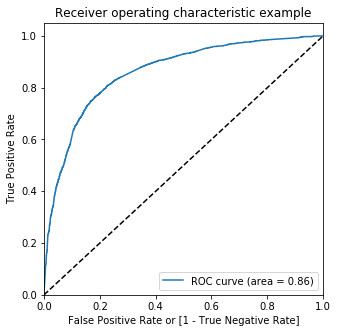

In [114]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

## Inference
The area under ROC curve is 0.86 which is a very good value.

In [115]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.235273,0,1,1,1,0,0,0,0,0,0,0
1,1,0.899787,1,1,1,1,1,1,1,1,1,1,0
2,1,0.993285,1,1,1,1,1,1,1,1,1,1,1
3,1,0.604822,1,1,1,1,1,1,1,1,0,0,0
4,0,0.499889,0,1,1,1,1,1,0,0,0,0,0


In [116]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.388683,1.000000,0.000000
0.1,0.1,0.556741,0.974145,0.291351
0.2,0.2,0.701299,0.908910,0.569297
0.3,0.3,0.776438,0.831344,0.741528
0.4,0.4,0.797619,0.750994,0.827264
0.5,0.5,0.797155,0.672633,0.876328
0.6,0.6,0.774892,0.550517,0.917552
0.7,0.7,0.758967,0.470565,0.942337
0.8,0.8,0.725417,0.346460,0.966363
0.9,0.9,0.675170,0.181782,0.988872


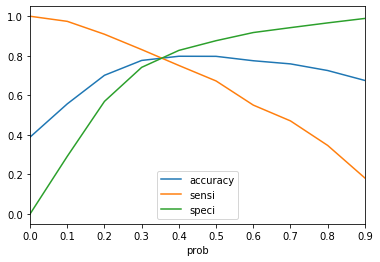

In [117]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## Inference
From the graph it is visible that the optimal cut off is at 0.35.

In [118]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.235273,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.899787,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.993285,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.604822,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.499889,0,1,1,1,1,1,0,0,0,0,0,1


In [119]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7884972170686456

In [120]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3105,  849],
       [ 519, 1995]], dtype=int64)

In [121]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [122]:
# Calculating the sensitivity
TP/(TP+FN)

0.7935560859188544

In [123]:
# Calculating the specificity
TN/(TN+FP)

0.7852807283763278

## Inference
With the current cut off as 0.35 we have sensitivity at 79.35%, accuracy at 79% and specificity of around 79%.

# 9. Prediction on Test set

In [124]:
# Scaling numeric values
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_others_leadorigin,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_others_leadsource,Lead Source_reference,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_others_lastactivity,Last Activity_page visited on website,Last Activity_sms sent,Last Activity_unreachable,Specialization_business administration,Specialization_finance management,Specialization_human resource management,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_others_specialization,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,A free copy of Mastering The Interview_yes,Last Notable Activity_modified,Last Notable Activity_others_lastnotableactivity,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
567,0.015936,0.147359,0.166667,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2303,0.007968,0.688859,0.083333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1523,0.011952,0.596538,0.125000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6923,0.019920,0.083000,0.208333,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
7841,0.007968,0.311585,0.083333,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [125]:
# Substituting all the columns in the final train model
col = X_train.columns

In [126]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_lead add form,Lead Source_olark chat,Last Activity_email bounced,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_student,Last Notable Activity_modified
567,1.0,0.015936,0.147359,0.166667,0,0,0,0,0,0,0
2303,1.0,0.007968,0.688859,0.083333,0,0,0,0,0,0,1
1523,1.0,0.011952,0.596538,0.125000,0,0,0,0,0,0,0
6923,1.0,0.019920,0.083000,0.208333,0,0,0,0,0,0,0
7841,1.0,0.007968,0.311585,0.083333,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9124,1.0,0.007968,0.118065,0.041667,0,0,0,0,1,0,1
1049,1.0,0.031873,0.703506,0.166667,0,0,0,0,0,0,1
7778,1.0,0.007968,0.135375,0.083333,0,0,0,0,0,0,1
6432,1.0,0.000000,0.000000,0.000000,0,1,0,0,1,0,0


In [127]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.194789
1,0,0.585096
2,0,0.668476
3,0,0.147358
4,0,0.358477


In [128]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.194789,0
1,0,0.585096,1
2,0,0.668476,1
3,0,0.147358,0
4,0,0.358477,1
...,...,...,...
2767,0,0.257394,0
2768,0,0.603224,1
2769,0,0.097750,0
2770,0,0.556697,1


In [129]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8026695526695526

In [130]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1378,  347],
       [ 200,  847]], dtype=int64)

In [131]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [132]:
# Calculating the sensitivity
TP/(TP+FN)

0.8089780324737345

In [133]:
# Calculating the specificity
TN/(TN+FP)

0.7988405797101449

### With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.

# 10. Precision-Recall

In [134]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3465,  489],
       [ 823, 1691]], dtype=int64)

In [135]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7756880733944954

In [136]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6726332537788385

### With the current cut off as 0.35 we have Precision around 78% and Recall around 67%

## 10.1. Precision and recall tradeoff

In [137]:
from sklearn.metrics import precision_recall_curve

In [138]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    1
 6466    0
 6467    1
 Name: Converted, Length: 6468, dtype: int64, 0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6463    0
 6464    0
 6465    0
 6466    0
 6467    1
 Name: Predicted, Length: 6468, dtype: int64)

In [139]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

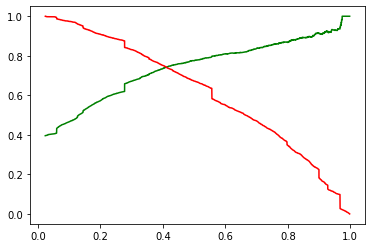

In [140]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [141]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.235273,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.899787,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.993285,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.604822,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.499889,0,1,1,1,1,1,0,0,0,0,0,1


In [142]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7999381570810142

In [143]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3304,  650],
       [ 644, 1870]], dtype=int64)

In [144]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [145]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7420634920634921

In [146]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7438345266507558

## Inference
With the current cut off as 0.41 we have Precision around 74.20% and Recall around 74.38%

# 11. Final Prediction on Test set

In [147]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.194789
1,0,0.585096
2,0,0.668476
3,0,0.147358
4,0,0.358477


In [148]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.194789,0
1,0,0.585096,1
2,0,0.668476,1
3,0,0.147358,0
4,0,0.358477,0
...,...,...,...
2767,0,0.257394,0
2768,0,0.603224,1
2769,0,0.097750,0
2770,0,0.556697,1


In [149]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8023088023088023

In [150]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1435,  290],
       [ 258,  789]], dtype=int64)

In [151]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [152]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7312326227988879

In [153]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7535816618911175

## Inference
With the current cut off as 0.41 we have Precision around 73.12% and Recall around 75%

# Conclusion
It was found that the variables that mattered the most in the potential buyers are (In descending order) :
1.	Page Views Per Visit.
2.	TotalVisits
3.  Total Time Spent on Website
4.	When the Lead Source was:
    a.	olark chat
5.	When the Last Activity was:<br>
    a.	olark chat conversation
    b.  sms sent
    c.  email bounced
6.	When the Lead Origin is lead add format
7.  What is your current occupation_student
8.  What is your current occupation_other

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.